# 1 Importing all important library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Reading file

In [2]:
df=pd.read_csv("ADO April 2023 - Inflation.csv",encoding="unicode_escape")

# 3. First 5 rows

In [3]:
df.head()

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2018,2.7,%,NaN,NaN
1,Developing Asia,2019,3.2,%,NaN,NaN
2,Developing Asia,2020,3.3,%,NaN,NaN
3,Developing Asia,2021,2.6,%,NaN,NaN
4,Developing Asia,2022,4.4,%,NaN,NaN


# 4. Last five rows 

In [4]:
df.tail()

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
366,Vanuatu,2020,5.3,%,The Pacific,VUT
367,Vanuatu,2021,2.3,%,The Pacific,VUT
368,Vanuatu,2022,4.8,%,The Pacific,VUT
369,Vanuatu,2023 forecast,4.0,%,The Pacific,VUT
370,Vanuatu,2024 forecast,3.0,%,The Pacific,VUT


# 5. All Information about Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RegionalMember       371 non-null    object 
 1   Year                 371 non-null    object 
 2   Inflation            365 non-null    float64
 3   Unit of Measurement  371 non-null    object 
 4    Subregion           357 non-null    object 
 5    Country Code        322 non-null    object 
dtypes: float64(1), object(5)
memory usage: 17.5+ KB


In [6]:
#Here are total 6 columns and 370 rows

#  6. Statistics about Data

In [7]:
df.describe(include='all')

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
count,371,371,365.000000,371,357,322
unique,53,7,NaN,1,5,46
top,Developing Asia,2018,NaN,%,The Pacific,ARM
freq,7,53,NaN,371,105,7
mean,NaN,NaN,4.728767,NaN,NaN,NaN
std,NaN,NaN,4.555189,NaN,NaN,NaN
min,NaN,NaN,-6.600000,NaN,NaN,NaN
25%,NaN,NaN,2.200000,NaN,NaN,NaN
50%,NaN,NaN,3.700000,NaN,NaN,NaN
75%,NaN,NaN,6.200000,NaN,NaN,NaN


# 7.cheking Null values

In [8]:
df.isnull().sum()/len(df)*100

RegionalMember          0.000000
Year                    0.000000
Inflation               1.617251
Unit of Measurement     0.000000
 Subregion              3.773585
 Country Code          13.207547
dtype: float64

# **** Starting EDA ******

# 8. Seprating numerical columns and categorical columns

In [9]:
# Categorical columns

In [10]:
cat_col=df.select_dtypes(include=["O"]).columns
cat_col

Index(['RegionalMember', 'Year', 'Unit of Measurement', ' Subregion',
       ' Country Code'],
      dtype='object')

In [11]:
# Numerical columns

In [12]:
num_col=df.select_dtypes(include=['int','float']).columns
num_col

Index(['Inflation'], dtype='object')

In [13]:
df['RegionalMember'].unique()

array(['Developing Asia', 'Developing Asia excluding the PRC',
       'Caucasus and Central Asia', 'Armenia', 'Azerbaijan', 'Georgia',
       'Kazakhstan', 'Kyrgyz Republic', 'Tajikistan', 'Turkmenistan',
       'Uzbekistan', 'East Asia', 'Hong Kong, China', 'Mongolia',
       "People's Republic of China", 'Republic of Korea', 'Taipei,China',
       'South Asia', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
       'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka', 'Southeast Asia',
       'Brunei Darussalam', 'Cambodia', 'Indonesia',
       'Lao People\x92s Dem. Rep.', 'Malaysia', 'Myanmar', 'Philippines',
       'Singapore', 'Thailand', 'Timor-Leste', 'Viet Nam', 'The Pacific',
       'Cook Islands', 'Federated States of Micronesia', 'Fiji',
       'Kiribati', 'Marshall Islands', 'Nauru', 'Niue', 'Palau',
       'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu',
       'Vanuatu'], dtype=object)

In [14]:
df['Year'].unique()

array(['2018', '2019', '2020', '2021', '2022', '2023 forecast',
       '2024 forecast'], dtype=object)

In [15]:
df['Year']=df['Year'].str.replace('forecast','')

In [16]:
df['Year'].unique()

array(['2018', '2019', '2020', '2021', '2022', '2023 ', '2024 '],
      dtype=object)

In [17]:
df['Year']=df['Year'].astype('int')

In [18]:
df['Year'].dtype

dtype('int32')

In [19]:
df['Unit of Measurement'].unique()

array(['%'], dtype=object)

In [20]:
df[' Subregion'].unique()

array([nan, 'Central Asia', 'East Asia', 'South Asia', 'Southeast Asia',
       'The Pacific'], dtype=object)

# 9. Display Bar plot of top five subregion  

<AxesSubplot:ylabel=' Subregion'>

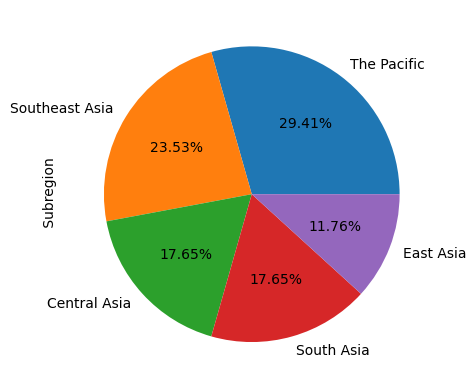

In [21]:
df[' Subregion'].value_counts().head().plot(kind='pie',autopct='%.2f%%')

In [22]:
df[' Country Code'].unique()

array([nan, 'ARM', 'AZE', 'GEO', 'KAZ', 'KGZ', 'TJK', 'TKM', 'UZB', 'HKG',
       'MNG', 'CHN', 'KOR', 'TWN', 'AFG', 'BGD', 'BTN', 'IND', 'MDV',
       'NPL', 'PAK', 'LKA', 'BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR',
       'PHL', 'SGP', 'THA', 'TLS', 'VNM', 'COO', 'FSM', 'FJI', 'KIR',
       'MHL', 'NRU', 'NIU', 'PLW', 'PNG', 'WSM', 'SLB', 'TON', 'TUV',
       'VUT'], dtype=object)

In [23]:
df[' Country Code'].mode().value_counts()

AFG    1
SLB    1
MYS    1
NIU    1
NPL    1
NRU    1
PAK    1
PHL    1
PLW    1
PNG    1
SGP    1
THA    1
ARM    1
TJK    1
TKM    1
TLS    1
TON    1
TUV    1
TWN    1
UZB    1
VNM    1
VUT    1
MNG    1
MMR    1
MHL    1
MDV    1
AZE    1
BGD    1
BRN    1
BTN    1
CHN    1
COO    1
FJI    1
FSM    1
GEO    1
HKG    1
IDN    1
IND    1
KAZ    1
KGZ    1
KHM    1
KIR    1
KOR    1
LAO    1
LKA    1
WSM    1
Name:  Country Code, dtype: int64

In [24]:
df[' Country Code']=df[' Country Code'].str.replace("nan",'AFG')

In [25]:
df[' Country Code'].unique()

array([nan, 'ARM', 'AZE', 'GEO', 'KAZ', 'KGZ', 'TJK', 'TKM', 'UZB', 'HKG',
       'MNG', 'CHN', 'KOR', 'TWN', 'AFG', 'BGD', 'BTN', 'IND', 'MDV',
       'NPL', 'PAK', 'LKA', 'BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR',
       'PHL', 'SGP', 'THA', 'TLS', 'VNM', 'COO', 'FSM', 'FJI', 'KIR',
       'MHL', 'NRU', 'NIU', 'PLW', 'PNG', 'WSM', 'SLB', 'TON', 'TUV',
       'VUT'], dtype=object)

#  10.Display bar plot of top 5 country code

<AxesSubplot:ylabel=' Country Code'>

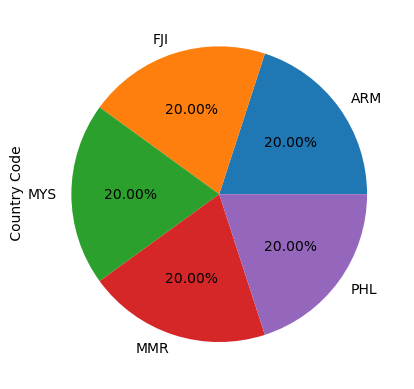

In [26]:
df[' Country Code'].value_counts().head().plot(kind='pie',autopct="%.2f%%")

In [27]:
df

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2018,2.7,%,NaN,NaN
1,Developing Asia,2019,3.2,%,NaN,NaN
2,Developing Asia,2020,3.3,%,NaN,NaN
3,Developing Asia,2021,2.6,%,NaN,NaN
4,Developing Asia,2022,4.4,%,NaN,NaN
...,...,...,...,...,...,...
366,Vanuatu,2020,5.3,%,The Pacific,VUT
367,Vanuatu,2021,2.3,%,The Pacific,VUT
368,Vanuatu,2022,4.8,%,The Pacific,VUT
369,Vanuatu,2023,4.0,%,The Pacific,VUT


# 10. Display  All the information whoes inflamation is greater than 2.5

In [28]:
df[df['Inflation']>2.5]

,RegionalMember,Year,Inflation,Unit of Measurement,Subregion,Country Code
0,Developing Asia,2018,2.7,%,NaN,NaN
1,Developing Asia,2019,3.2,%,NaN,NaN
2,Developing Asia,2020,3.3,%,NaN,NaN
3,Developing Asia,2021,2.6,%,NaN,NaN
4,Developing Asia,2022,4.4,%,NaN,NaN
...,...,...,...,...,...,...
365,Vanuatu,2019,2.8,%,The Pacific,VUT
366,Vanuatu,2020,5.3,%,The Pacific,VUT
368,Vanuatu,2022,4.8,%,The Pacific,VUT
369,Vanuatu,2023,4.0,%,The Pacific,VUT


# 11. Give the name of country which has maximum inflamation

In [29]:
df.groupby('RegionalMember')['Inflation'].max().head(1)

RegionalMember
Afghanistan    13.8
Name: Inflation, dtype: float64

#  12.Give the name of country which has minimum inflamation

In [30]:
df.groupby('RegionalMember')['Inflation'].min().head(1)

RegionalMember
Afghanistan    0.6
Name: Inflation, dtype: float64

# 13 Total number of country who participated in inflmation measurment

In [31]:
df["RegionalMember"].count()

371